# Comparison of the algorithms over the Real Dataset provided

This extension uses the corrected version of the real dataset as a golden standard or ground truth

In [1]:
# Importing all the required modules

import numpy as np
import drift_algorithms as algo
from tqdm import tqdm

In [2]:
# Open the original_dataset_real.txt file in the real_data folder and read the data
import json

file_original = open("real_data/original_dataset_real.txt", "r")
text_original = file_original.read()
data_original = json.loads(text_original)

file_corrected = open("real_data/corrected_dataset_real.txt", "r")
text_corrected = file_corrected.read()
data_corrected = json.loads(text_corrected)

keys = ['001', '007', '016', '043', '063', '064', '107', '120', '128', '136', '137', '152', '154', '179', '180', '192', '196', '207', '215', '216', '217', '244', '249', '259', '271', '285', '288']

# Loop over all the keys in the keys list
# for key in keys:
#     print(data[key])

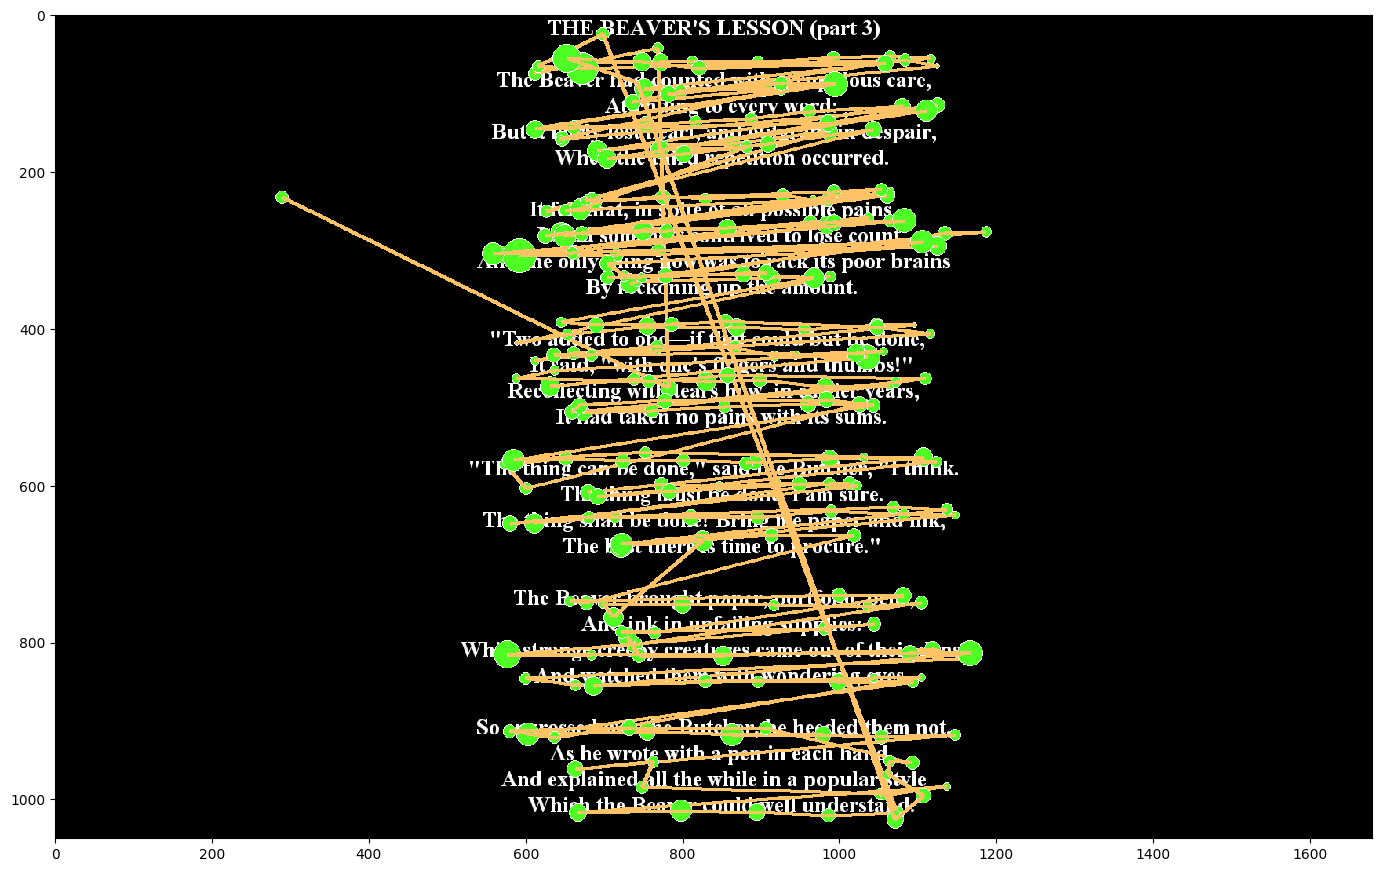

In [3]:
# Draw original fixations

import correction

correction.draw_fixation('real_data/TEX_R8S1_bg.png', data_original['001'].copy())

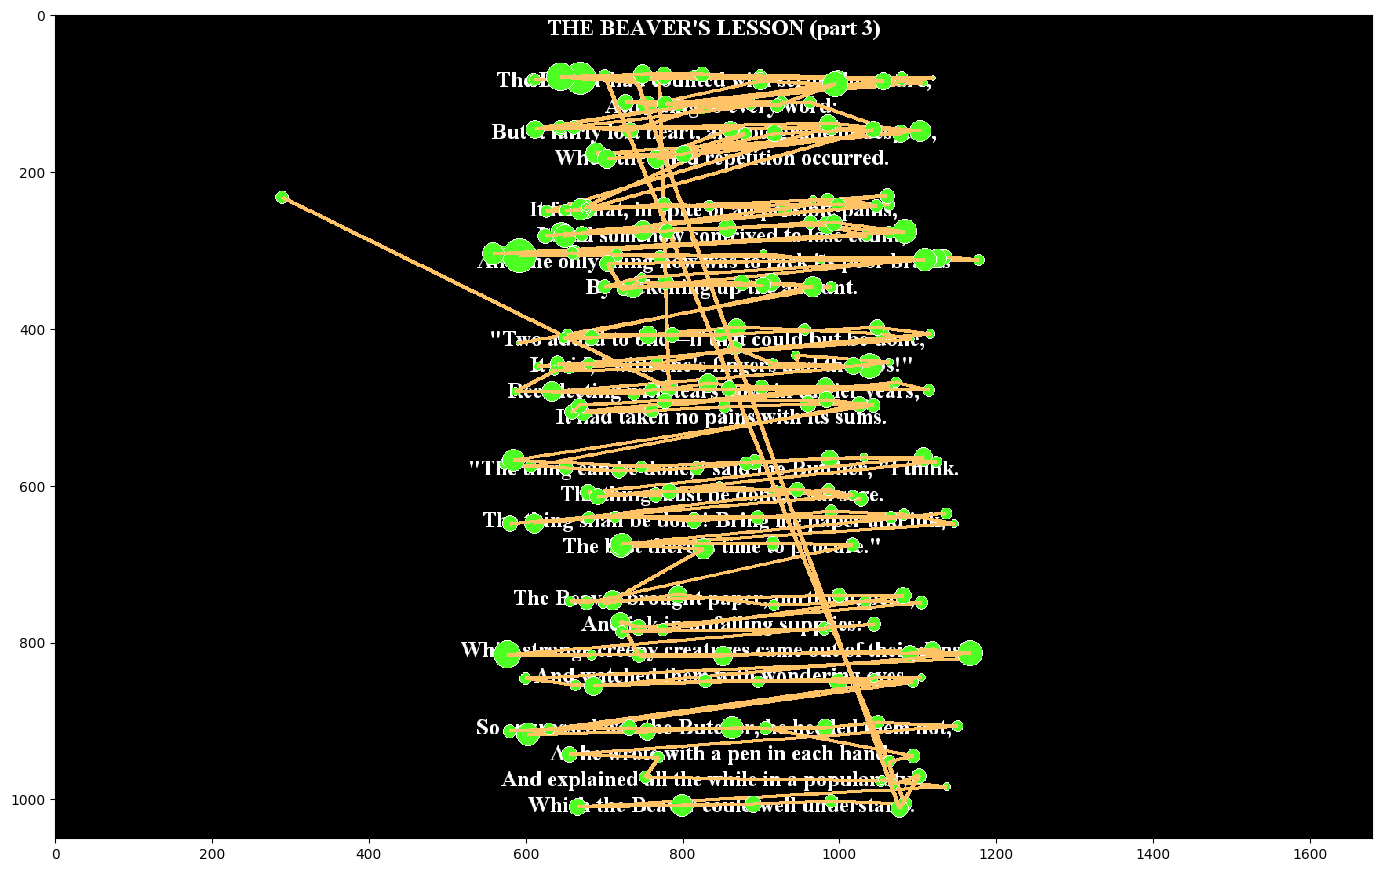

In [4]:
# Draw the corrected fixations

correction.draw_fixation('real_data/TEX_R8S1_bg.png', data_corrected['001'].copy())

In [5]:
# Finding the areas of interests in the image

import emip_toolkit as EMTK

image_path = 'real_data/'
image = 'TEX_R8S1_bg.png'
aoi = EMTK.find_aoi(image, image_path, level="sub-line")

# Add the tokens 

# add tokens to AOIs 
file_path = "./"
aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, 'real_data/' + image.split(".")[0]+".txt", aoi)
print(aois_with_tokens.head())


# find the y coordinate of each line in the text
line_ys = correction.find_lines_Y(aoi)

       kind           name       x  y width height            image     token
0  sub-line  line 1 part 1   626.5  5    63     32  TEX_R8S1_bg.png       THE
1  sub-line  line 1 part 2   692.5  5   146     32  TEX_R8S1_bg.png  BEAVER'S
2  sub-line  line 1 part 3   841.5  5   117     32  TEX_R8S1_bg.png    LESSON
3  sub-line  line 1 part 4   960.5  5    65     32  TEX_R8S1_bg.png     (part
4  sub-line  line 1 part 5  1026.5  5    28     32  TEX_R8S1_bg.png        3)


/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colb

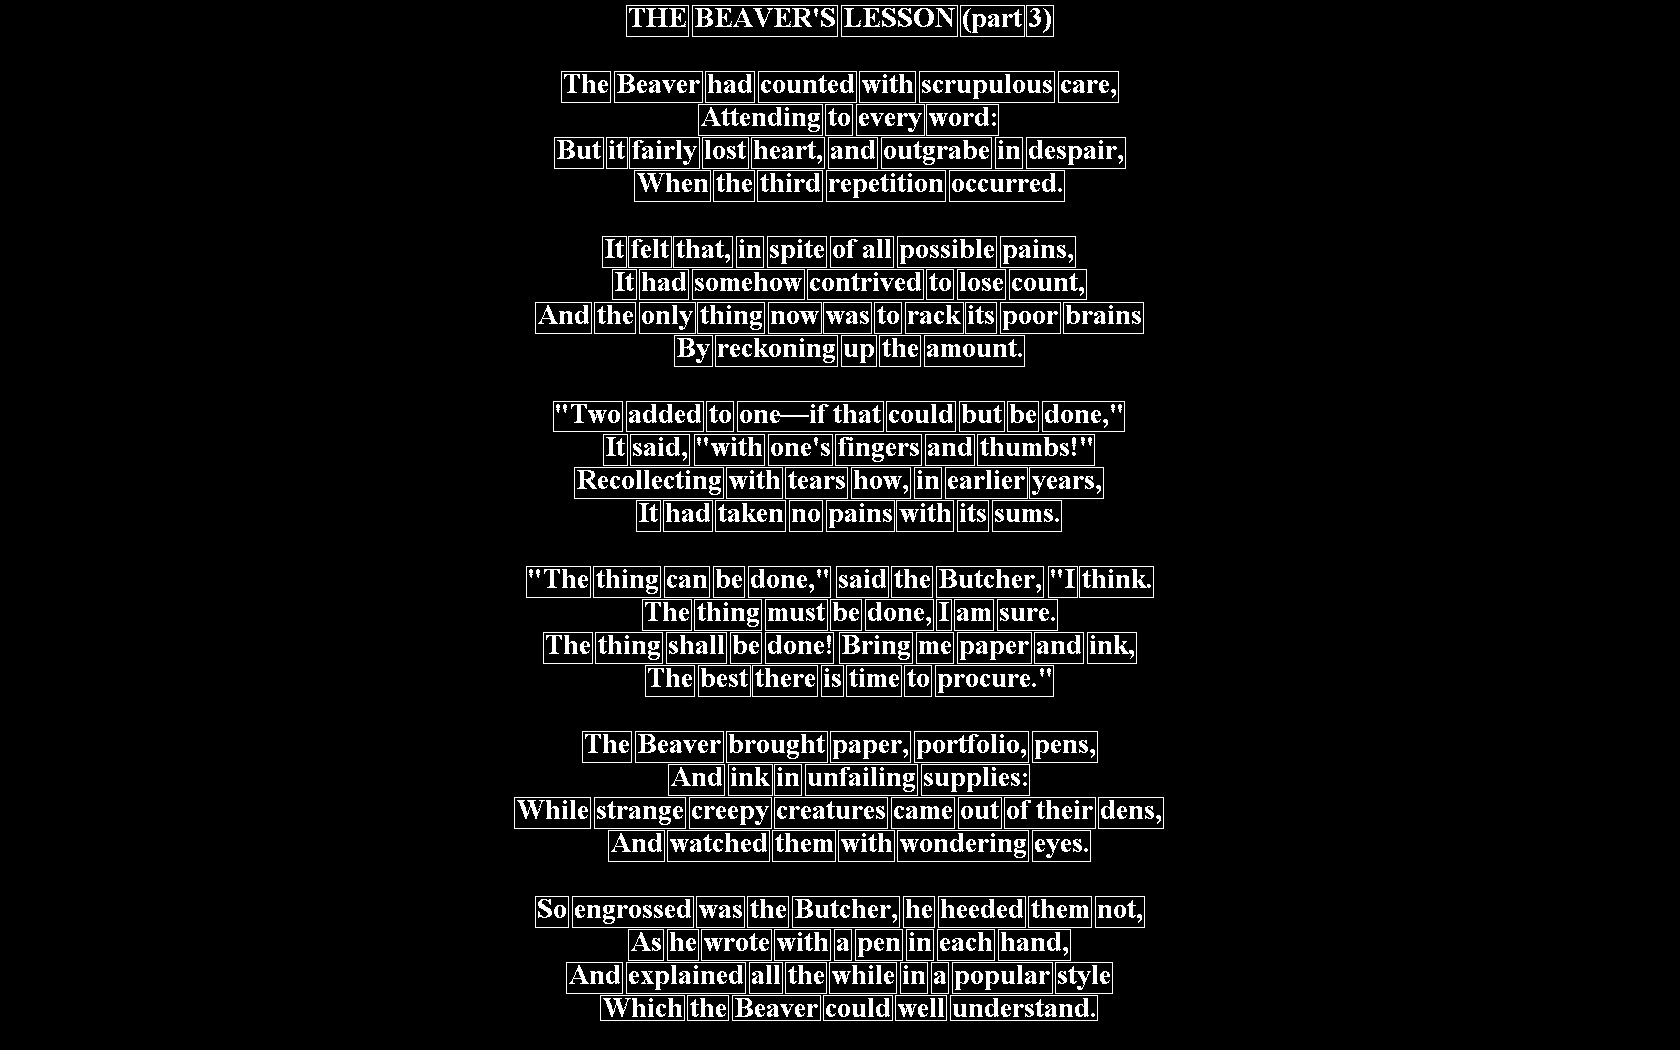

In [6]:
# A visualized representation of the AOIs

EMTK.draw_aoi(aoi, image, image_path)

0.34375
fixations:  256
match_list:  256


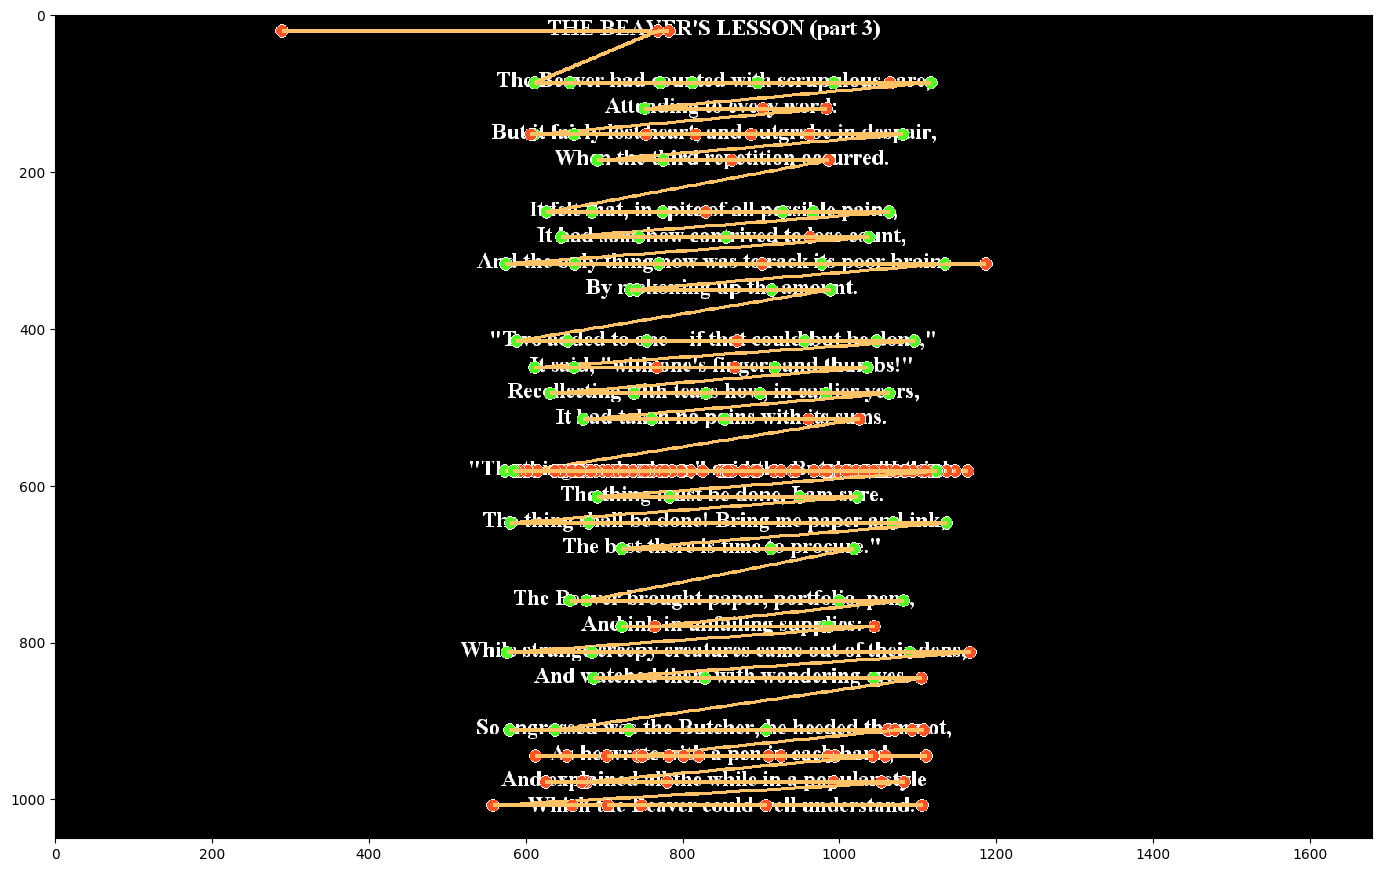

In [7]:
# find the center of each word, we need this for warp algorithm
word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

# warp correction
np_array = np.array(data_original['001'].copy(), dtype=int)
durations = np.delete(np_array, 0, 1)
durations = np.delete(durations, 0, 1)
np_array = np.delete(np_array, 2, 1)

# run warp
warp_correction = algo.warp(np_array, word_centers)

# this is a cool function that checks the quality of the correction
percentage, match_list = correction.correction_quality(aoi, data_corrected['001'].copy(), warp_correction)
print(percentage)

# this is a cool function that draws the correction in red if the algorithm made a mistake
correction.draw_correction('real_data/TEX_R8S1_bg.png', warp_correction, match_list)

# Comparing algorithms with Real Data error:

In [37]:
attach_results = []
chain_results = []
regress_results = []
warp_results = []
# Initializing the remaining 6 algorithms
cluster_results = []
compare_results = []
merge_results = []
segment_results = []
split_results = []
stretch_results = []


word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

duration_word_centers = correction.find_word_centers_and_duration(aois_with_tokens)
duration_word_centers = np.array(duration_word_centers.copy(), dtype=int)

# MAKE SURE YOU RUN THIS 100 TIMES, NOT JUST ONE!!!
for i, key in enumerate(keys):
    
    # Error already exists owing to real world data

    # Printing i, key to keep track of progress
    print(i, key)
        
    error_data = data_original[key]
    corrected_data = data_corrected[key]

    # attach correction - 1
    np_array = np.array(error_data.copy())
    attach_correction = algo.attach(np_array, line_ys)
    percentage, match_list = correction.correction_quality(aoi, corrected_data.copy(), attach_correction)
    attach_results.append(percentage)

    # chain correction - 2
    np_array = np.array(error_data.copy())
    chain_correction = algo.chain(np_array, line_ys)
    percentage, match_list = correction.correction_quality(aoi, corrected_data.copy(), chain_correction)
    chain_results.append(percentage)
        
    # regress correction - 3
    np_array = np.array(error_data.copy())
    regress_correction = algo.regress(np_array, line_ys)
    percentage, match_list = correction.correction_quality(aoi, corrected_data.copy(), regress_correction)
    regress_results.append(percentage)
        
    # warp correction - 4
    np_array = np.array(error_data.copy(), dtype=int)
    durations = np.delete(np_array, 0, 1)
    durations = np.delete(durations, 0, 1)
    np_array = np.delete(np_array, 2, 1)
        
    warp_correction = algo.warp(np_array, word_centers)
    percentage, match_list = correction.correction_quality(aoi, corrected_data.copy(), warp_correction)
    warp_results.append(percentage)

    if percentage < 1:
        # correction.draw_correction('synthetic_text.png', warp_correction, match_list)
        print("key:", key)

    # cluster correction - 5
    np_array = np.array(error_data.copy())
    cluster_correction = algo.cluster(np_array, line_ys)
    percentage, match_list = correction.correction_quality(aoi, corrected_data.copy(), cluster_correction)
    cluster_results.append(percentage)

    # compare correction - 6 which takes in fixation_XY, word_XY
    np_array = np.array(error_data.copy())
    compare_correction = algo.compare(np_array, duration_word_centers)
    percentage, match_list = correction.correction_quality(aoi, corrected_data.copy(), compare_correction)
    compare_results.append(percentage)

    # merge correction - 7
    np_array = np.array(error_data.copy())
    merge_correction = algo.merge(np_array, line_ys)
    percentage, match_list = correction.correction_quality(aoi, corrected_data.copy(), merge_correction)
    merge_results.append(percentage)

    # segment correction - 8
    np_array = np.array(error_data.copy())
    segment_correction = algo.segment(np_array, line_ys)
    percentage, match_list = correction.correction_quality(aoi, corrected_data.copy(), segment_correction)
    segment_results.append(percentage)

    # split correction - 9
    np_array = np.array(error_data.copy())
    split_correction = algo.split(np_array, line_ys)
    percentage, match_list = correction.correction_quality(aoi, corrected_data.copy(), split_correction)
    split_results.append(percentage)

    # stretch correction - 10
    np_array = np.array(error_data.copy())
    stretch_correction = algo.stretch(np_array, line_ys)
    percentage, match_list = correction.correction_quality(aoi, corrected_data.copy(), stretch_correction)
    stretch_results.append(percentage)


0 001
key: 001
1 007
key: 007
2 016
key: 016
3 043
key: 043
4 063
key: 063
5 064
key: 064
6 107
key: 107
7 120
key: 120
8 128
key: 128
9 136
key: 136
10 137
key: 137
11 152
key: 152
12 154
key: 154
13 179
key: 179
14 180
key: 180
15 192
key: 192
16 196
key: 196
17 207
key: 207
18 215
key: 215
19 216
key: 216
20 217
key: 217
21 244
key: 244
22 249
key: 249
23 259
key: 259
24 271
key: 271
25 285
key: 285
26 288
key: 288


In [40]:
# Finbding the mean of each algorithm
mean_attach_results = np.mean(attach_results)
mean_chain_results = np.mean(chain_results)
mean_regress_results = np.mean(regress_results)
mean_warp_results = np.mean(warp_results)
mean_cluster_results = np.mean(cluster_results)
mean_compare_results = np.mean(compare_results)
mean_merge_results = np.mean(merge_results)
mean_segment_results = np.mean(segment_results)
mean_split_results = np.mean(split_results)
mean_stretch_results = np.mean(stretch_results)

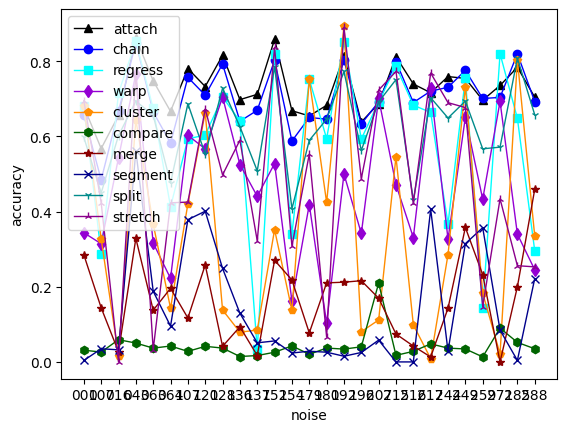

In [41]:
import matplotlib.pyplot as plt
plt.plot(attach_results, color='Black', linewidth=1, marker='^')
plt.plot(chain_results, color='Blue', linewidth=1, marker='o')
plt.plot(regress_results, color='Aqua', linewidth=1, marker='s')
plt.plot(warp_results, color='DarkViolet', linewidth=1, marker='d')
plt.plot(cluster_results, color='DarkOrange', linewidth=1, marker='p')
plt.plot(compare_results, color='DarkGreen', linewidth=1, marker='h')
plt.plot(merge_results, color='DarkRed', linewidth=1, marker='*')
plt.plot(segment_results, color='DarkBlue', linewidth=1, marker='x')
plt.plot(split_results, color='DarkCyan', linewidth=1, marker='1')
plt.plot(stretch_results, color='DarkMagenta', linewidth=1, marker='2')

plt.legend(['attach', 'chain', 'regress', 'warp', 'cluster', 'compare', 'merge', 'segment', 'split', 'stretch'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('noise')

# Plotting the keys on the x-axis
x_ticks_labels = ['001', '007', '016', '043', '063', '064', '107', '120', '128', '136', '137', '152', '154', '179', '180', '192', '196', '207', '215', '216', '217', '244', '249', '259', '271', '285', '288']
plt.xticks(range(0, len(x_ticks_labels)), x_ticks_labels)


#plt.savefig("noise_comparison.png")
plt.show()

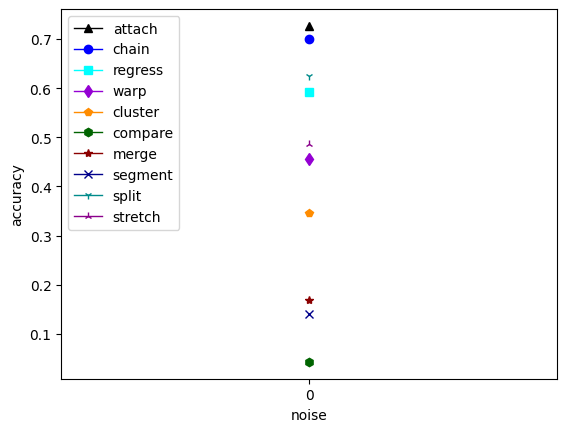

In [42]:
# Plotting the mean of the algorithms as the x-axis
plt.plot([mean_attach_results], color='Black', linewidth=1, marker='^')
plt.plot([mean_chain_results], color='Blue', linewidth=1, marker='o')
plt.plot([mean_regress_results], color='Aqua', linewidth=1, marker='s')
plt.plot([mean_warp_results], color='DarkViolet', linewidth=1, marker='d')
plt.plot([mean_cluster_results], color='DarkOrange', linewidth=1, marker='p')
plt.plot([mean_compare_results], color='DarkGreen', linewidth=1, marker='h')
plt.plot([mean_merge_results], color='DarkRed', linewidth=1, marker='*')    
plt.plot([mean_segment_results], color='DarkBlue', linewidth=1, marker='x')
plt.plot([mean_split_results], color='DarkCyan', linewidth=1, marker='1')
plt.plot([mean_stretch_results], color='DarkMagenta', linewidth=1, marker='2')

plt.legend(['attach', 'chain', 'regress', 'warp', 'cluster', 'compare', 'merge', 'segment', 'split', 'stretch'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('noise')

# Plotting the names of the algorithms as the x-axis
plt.xticks(np.arange(0, 1, 1))
#plt.savefig("noise_comparison.png")
plt.show()

In [43]:
import statistics

print("mean attach:", mean_attach_results)
print("mean chain:", mean_chain_results)
print("mean regress:", mean_regress_results)
print("mean warp:", mean_warp_results)
print("mean cluster:", mean_cluster_results)
print("mean compare:", mean_compare_results)
print("mean merge:", mean_merge_results)
print("mean segment:", mean_segment_results)
print("mean split:", mean_split_results)
print("mean stretch:", mean_stretch_results)


mean attach: 0.7268312261833659
mean chain: 0.7007864617833396
mean regress: 0.5928062083128167
mean warp: 0.45636233613728805
mean cluster: 0.345535788826163
mean compare: 0.04253897652856279
mean merge: 0.16816400561626768
mean segment: 0.13976630717862273
mean split: 0.624612480889925
mean stretch: 0.4866427358800967
